# Analyze Record Data

In [1]:
import pandas as pd

RECORD_DATA_PATH = "record_data.csv"

In [2]:
record_data = pd.read_csv(RECORD_DATA_PATH)
record_data

,MUTATION_EFFECT_LABEL,PROTEIN,MUTATION,INTERACTOR,PDB_ID,CHAIN_ID,ERROR_ENCOUNTERED,SUBMITTED,SAVED,RESULT_URL,PREDICTED_AFFINITY_CHANGE_VALUE,PREDICTED_AFFINITY_CHANGE,MUTATION_DETAILS_CHAIN,MUTATION_DETAILS_POSITION,MUTATION_DETAILS_WILDTYPE,MUTATION_DETAILS_MUTANT,MUTATION_DETAILS_DISTANCE_FROM_CLOSEST_PARTNER
0,0,Q9BPZ3,F118A,P11940,1jgn,B,Provided mutation position does not match with...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,P01116,Y40C,P50749,3ddc,A,NaN,1,1,http://biosig.unimelb.edu.au/mcsm_ppi2/results...,-2.180,Decreasing affinity,A,40.0,TYR,CYS,3.494Å
2,0,Q96QK1,F534D,Q9UBQ0,2r17,C,NaN,1,1,http://biosig.unimelb.edu.au/mcsm_ppi2/results...,-1.982,Decreasing affinity,C,534.0,PHE,ASP,3.482Å
3,0,Q96QK1,F534D,Q9UBQ0-2,2r17,C,NaN,1,1,http://biosig.unimelb.edu.au/mcsm_ppi2/results...,-1.982,Decreasing affinity,C,534.0,PHE,ASP,3.482Å
4,0,O43521-3,G66A,Q07812,3fdl,B,Provided mutation position does not match with...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0,P84243,Q94A,Q9UER7-3,4hga,B,Provided mutation position does not match with...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
736,0,Q96QK1,L589D,Q9UBQ0,2r17,C,NaN,1,1,http://biosig.unimelb.edu.au/mcsm_ppi2/results...,-1.820,Decreasing affinity,C,589.0,LEU,ASP,3.433Å
737,0,Q96QK1,L589D,Q9UBQ0-2,2r17,C,NaN,1,1,http://biosig.unimelb.edu.au/mcsm_ppi2/results...,-1.820,Decreasing affinity,C,589.0,LEU,ASP,3.433Å
738,0,P23297,F72L,P25815,2y5i,A,NaN,1,1,http://biosig.unimelb.edu.au/mcsm_ppi2/results...,-2.001,Decreasing affinity,A,72.0,PHE,LEU,3.527Å


In [3]:
errors_encountered = set()
for error_message in record_data["ERROR_ENCOUNTERED"].unique():

    if pd.isnull(error_message):
        continue

    error_header = error_message.split("\n")[0]
    errors_encountered.add(error_header)

errors_encountered

{'Provided mutation position does not match with PDB file.'}

In [4]:
prediction_data = record_data[
    ["MUTATION_EFFECT_LABEL", "PROTEIN", "MUTATION", "INTERACTOR", "PDB_ID", "CHAIN_ID", "PREDICTED_AFFINITY_CHANGE"]
].copy()

prediction_data = prediction_data.rename(
    columns={
        "MUTATION_EFFECT_LABEL": "Mutation_Effect_Label",
        "PROTEIN": "UniProt_ID",
        "MUTATION": "Mutation",
        "INTERACTOR": "Interactor_UniProt_ID",
        "PDB_ID": "pdb_id",
        "CHAIN_ID": "chain_id",
        "PREDICTED_AFFINITY_CHANGE": "mCSM_PP2_Prediction"
    }
)

prediction_data

,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,pdb_id,chain_id,mCSM_PP2_Prediction
0,0,Q9BPZ3,F118A,P11940,1jgn,B,NaN
1,0,P01116,Y40C,P50749,3ddc,A,Decreasing affinity
2,0,Q96QK1,F534D,Q9UBQ0,2r17,C,Decreasing affinity
3,0,Q96QK1,F534D,Q9UBQ0-2,2r17,C,Decreasing affinity
4,0,O43521-3,G66A,Q07812,3fdl,B,NaN
...,...,...,...,...,...,...,...
735,0,P84243,Q94A,Q9UER7-3,4hga,B,NaN
736,0,Q96QK1,L589D,Q9UBQ0,2r17,C,Decreasing affinity
737,0,Q96QK1,L589D,Q9UBQ0-2,2r17,C,Decreasing affinity
738,0,P23297,F72L,P25815,2y5i,A,Decreasing affinity


[nan, 'Decreasing affinity', 'Increasing affinity']


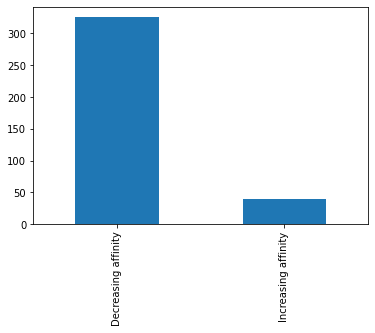

In [5]:
print(prediction_data["mCSM_PP2_Prediction"].unique().tolist())
prediction_data["mCSM_PP2_Prediction"].value_counts().plot(kind="bar");

In [6]:
prediction_data["mCSM_PP2_Prediction"] = prediction_data["mCSM_PP2_Prediction"].replace(
    {"Decreasing affinity": 0, "Increasing affinity": 1}
)
prediction_data

,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,pdb_id,chain_id,mCSM_PP2_Prediction
0,0,Q9BPZ3,F118A,P11940,1jgn,B,NaN
1,0,P01116,Y40C,P50749,3ddc,A,0.0
2,0,Q96QK1,F534D,Q9UBQ0,2r17,C,0.0
3,0,Q96QK1,F534D,Q9UBQ0-2,2r17,C,0.0
4,0,O43521-3,G66A,Q07812,3fdl,B,NaN
...,...,...,...,...,...,...,...
735,0,P84243,Q94A,Q9UER7-3,4hga,B,NaN
736,0,Q96QK1,L589D,Q9UBQ0,2r17,C,0.0
737,0,Q96QK1,L589D,Q9UBQ0-2,2r17,C,0.0
738,0,P23297,F72L,P25815,2y5i,A,0.0


<AxesSubplot:>

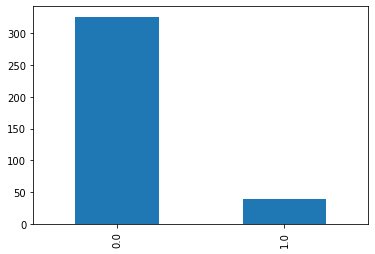

In [7]:
prediction_data["mCSM_PP2_Prediction"].value_counts().plot(kind="bar");

In [8]:
from utils import save_prediction_data

In [9]:
save_prediction_data(".", "mcsm_ppi2_predictions", prediction_data)

Prediction data `.\mcsm_ppi2_predictions_2022-02-24.csv`is exported.
